# L02.3 Hands on statistical modeling
In this hands-on session, you will:
1. perform graphical investigations on real driving data
2. apply data filtering 
3. derive a statistical noise model
4. work with probabilties

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# 0. Data loading & cleansing
Further information about the data and their meanings: 
```
'time_stamp': time stamp in s
'ay_raw': raw lateral acceleration in m/s^2. ay < 0 --> right; ay > 0 --> left
'vx_raw': raw longitudinal velocity in m/s
'lkas_status': status information of the LKAS in -
'lon': longitude in deg
'lat': latitude in deg
'd2ll': distance to left line marking in m
'd2rl': distance to right line marking in m
'd2cl': distance to center of the road in m
```

## 0.1 Loading data

In [23]:
def get_dict_from_dataframe(df):
    data = {}
    for col in df.columns: 
        data[col] = df[col].values.tolist()
    return data

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/lnxdxC/DSAI/main/L02_Visualization_and_Statistics/data/motion_data.csv')
# Get single variables out of the dict

#locals().update(get_dict_from_dataframe(data))

### ✏️ Visualize the driven trajectory of the vehicle by using a suitable plot type

Text(0, 0.5, 'Longitude in deg')

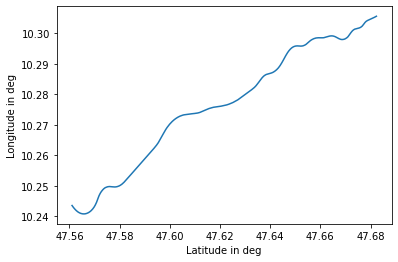

In [25]:
plt.figure()
plt.plot(data.lat, data.lon)
plt.xlabel('Latitude in deg')
plt.ylabel('Longitude in deg')

### ❓ Question 1:
#### What type of plot did you choose and why did you choose it?


#### How high do you rate the trustworthiness of this representation? Are there any special features to look out for here?


### ✏️ Visualize the lateral accelearion of the vehicle by using a suitable plot type

### ❓ Question 2:
#### What type of plot did you choose and why did you choose it?

#### Describe the signal you are seeing. Is the signal accurate? Whats about the noise of the signal? What's about outlier?

### ✏️ 0.2 Filter acceleration data with a provided filter
Apply the provided filter on *ay_raw* to get the filtered signal for further processing. All required methods are implemented in *filter_butterworth*.

In [ ]:
import filter
data['ay_filtered'] = filter.filter_butterworth(x)

### ✏️ Visualize both lateral accelearions of the vehicle only if the lane keeping assistant system (LKAS) was active.

# 1 Statistical model
### ✏️ 1.1 Determine the *difference signal* between both lateral accelerations
Assuming, that the filtered signal respresents the ground truth (GT) signal, we can determine the difference between the observed signal (obs) and the ground truth.
We can express this as: 
\begin{align}
\bar{x}_{obs} = \bar{x}_{GT} + \gamma
\end{align}
Whereby $ \gamma $ represents the noise of the measurement.

In [ ]:
ay_diff = x - y

### ✏️ 1.1 Determine the most important statistical parameters from the *difference signal*. Plot the noise of the measured signal to obtain a statistical model from that.
In simulation environments, we often have ideal sensors. However, the sensors do not provide realistic data because, for example, they are not noisy. In order to test the entire tool chain with simulated data, we also want the ideal data to be noisy. We create a noise model $ \gamma $ using the most important statistical parameters.

In the following, we will obtain a sensor model matching
\begin{align}
    \gamma \sim \mathcal{N}(\mu, \sigma)
\end{align}

In [ ]:
mean = 
stddev = 

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

# Determine the numbers of bins
nbins = int(2*ay_diff.size**(1.0/3.0))
n, bins, patches = ax.hist(ay_diff, bins=nbins, density=True, alpha=0.2);

# add a gaussian bell curve
gaussian = ((1 / (np.sqrt(2 * np.pi) * stddev)) * np.exp(-0.5 * (1 / stddev * (bins - mean))**2))
ax.plot(bins, gaussian)
ax.set_xlim([-2, 2]);

In [ ]:
# Determine noisy signal by using mean and std
gamma = np.random.normal(mean, stddev, len(data['time_stamp']))

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.plot(data.time_stamp, data.ay_filtered + gamma, alpha = 0.5, label='Model')

plt.plot(data.time_stamp, data.ay_raw, color=[0.5, 0.5, 0.5], alpha=0.2, label='INS, raw')
plt.plot(data.time_stamp, data.ay_filtered, label='INS, filtered')

plt.xlabel('Time in s')
plt.ylabel(r'a_y in m/s$^2$')
plt.xlim([0, data.time_stamp.iloc[-1]])

plt.legend()
plt.show()

# 2. Probabilities
### ✏️ 2.1 Determine the probability, that the noise is within a given interval.

Suppose you are driving your car, which is equipped with an IMU for high-precision motion measurement, on a straight section of road. You randomly draw a measured value from the entire measurement. With what probability is the __noise__ in the range of 0.125 m/s² and 0.25 m/s²?

Hint: To determine the probability, take a closer look into the cumulative distribution function [cdf](https://en.wikipedia.org/wiki/Cumulative_distribution_function). You are allowed to use the cdf function of scipy to solve the problem. 

In [ ]:
x1 = 0.125
x2 = 0.25

px = np.linspace(x1, x2, 50)
x = 

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, norm(mean, stddev).pdf(x), color='gray', alpha=0.3)
ax.fill_between(px, norm(mean, stddev).pdf(px), alpha=0.5, hatch='//')

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([0, 1.4])

In [ ]:
def z_score(x, mu, sigma):
    return x

In [ ]:
def get_probability(x1, x2, mu, sigma):
    return np.abs(norm.cdf(x2) - norm.cdf(x1))

In [ ]:
print(f'Probability to be between {x1} and {x2} is {np.round(get_probability(x1, x2, mean, stddev)*100, 2)} %')

### ✏️ 2.2 You randomly draw a measured value from the ground truth channel. With what probability you are driving on a left curve with 0.35-0.40 m/s²?
Rember the channel information! While using right-hand system of coordinates, ay > 0 means a right curve. 

In [ ]:
x1 = 
x2 = 

mean = np.mean(data.ay_filtered)
stddev = np.std(data.ay_filtered)

px = np.linspace(x1, x2, 1000)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, norm(mean, stddev).pdf(x), color='gray', alpha=0.3)
ax.fill_between(px, norm(mean, stddev).pdf(px), alpha=0.5, hatch='//')

print(f'Probability to be between {x1} and {x2} is {np.round(get_probability(x1, x2, mean, stddev)*100,2)} %')

### 2.3 Knowledge discovery
#### ❓ 2.3.1 On which road type we are driving? Choose between "Highway" and "Bundesstraße" by means of the data

#### ❓ 2.3.2 Compare the distances to the left (d2ll) and right lane marking (d2rl). Are you driving more often on the left or on the side of the road?